In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set random seed for reproducibility
random_seed = 42


#### loading data & exploratory analysis

In [40]:
# Read the dataset
df = pd.read_csv('Data/breast-cancer.csv')

# Display the first few rows of the dataset
print(df.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [41]:
# Get an overview of the dataset
print(df.info())

# Check the distribution of target variable
print(df['diagnosis'].value_counts())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [42]:
# Check for missing values 
missing_values = df.isnull().sum()
print(missing_values)

# handling missing values (replace them with mean)
X = X.fillna(X.mean())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


#### preprocessing data

In [43]:
from sklearn.preprocessing import LabelEncoder

# Encode the diagnosis column (Malignant = 1, Benign = 0)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Split the data into features (X) and target(dependent) variable (y)
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

In [44]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Calculating skewness of the features
skewness = X.skew()

# Select features with skewness above a threshold (0.5)
skewed_features = skewness[abs(skewness) > 0.5].index

# Applying power transformation 
power_transformer = PowerTransformer()
X_skewed = X[skewed_features].copy()
X_skewed_transformed = power_transformer.fit_transform(X_skewed)

# Replace the original skewed features with the transformed features
X[skewed_features] = X_skewed_transformed

# Normalize the features using standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [47]:
from sklearn.impute import SimpleImputer

# Check for missing values in the preprocessed data
missing_values = X_train_scaled.isnull().sum()
print(missing_values)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

radius_mean                56
texture_mean               65
perimeter_mean             55
area_mean                  38
smoothness_mean            70
compactness_mean           56
concavity_mean             31
concave points_mean        39
symmetry_mean              63
fractal_dimension_mean     50
radius_se                   4
texture_se                 53
perimeter_se                1
area_se                     0
smoothness_se              32
compactness_se             23
concavity_se                9
concave points_se          50
symmetry_se                32
fractal_dimension_se        4
radius_worst               52
texture_worst               0
perimeter_worst            54
area_worst                 19
smoothness_worst            0
compactness_worst          54
concavity_worst            64
concave points_worst       68
symmetry_worst             49
fractal_dimension_worst    53
dtype: int64


#### creating the bagging, boosting, and dummy classifiers

In [63]:
# Bagging Classifier with different estimator
bagging_clf_15 = BaggingClassifier(n_estimators=15, random_state=random_seed)
bagging_clf_10 = BaggingClassifier(n_estimators=10, random_state=random_seed)
bagging_clf_5 = BaggingClassifier(n_estimators=5, random_state=random_seed)

# AdaBoost Classifier with different estimator
adaboost_clf_15 = AdaBoostClassifier(n_estimators=15, random_state=random_seed)
adaboost_clf_10 = AdaBoostClassifier(n_estimators=10, random_state=random_seed)
adaboost_clf_5 = AdaBoostClassifier(n_estimators=5, random_state=random_seed)

# Dummy Classifier as a baseline
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=random_seed)


In [64]:
# Train and evaluate Bagging Classifier
bagging_clf_15.fit(X_train_scaled, y_train)
bagging_pred_15 = bagging_clf_15.predict(X_test_scaled)

bagging_clf_10.fit(X_train_scaled, y_train)
bagging_pred_10 = bagging_clf_10.predict(X_test_scaled)

bagging_clf_5.fit(X_train_scaled, y_train)
bagging_pred_5 = bagging_clf_5.predict(X_test_scaled)

# Train and evaluate AdaBoost Classifier
adaboost_clf_15.fit(X_train_scaled, y_train)
adaboost_pred_15 = adaboost_clf_15.predict(X_test_scaled)

adaboost_clf_10.fit(X_train_scaled, y_train)
adaboost_pred_10 = adaboost_clf_10.predict(X_test_scaled)

adaboost_clf_5.fit(X_train_scaled, y_train)
adaboost_pred_5 = adaboost_clf_5.predict(X_test_scaled)

# Train and evaluate Dummy Classifier
dummy_clf.fit(X_train_scaled, y_train)
dummy_pred = dummy_clf.predict(X_test_scaled)


#### evaluation

In [60]:
# Define evaluation metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-score': f1_score
}

def evaluate_model(model, predictions):
    eval_results = {}
    for metric_name, metric_func in metrics.items():
        if model.classes_[0] == 'B':
            label_mapping = {'B': 0, 'M': 1}
            y_test_mapped = y_test.map(label_mapping)
            predictions_mapped = [label_mapping[pred] for pred in predictions]
        else:
            y_test_mapped = y_test
            predictions_mapped = predictions
        eval_results[metric_name] = metric_func(y_test_mapped, predictions_mapped)
    return eval_results


In [65]:
# Evaluate Bagging Classifier
bagging_results_15 = evaluate_model(bagging_clf_15, bagging_pred_15)
bagging_results_10 = evaluate_model(bagging_clf_10, bagging_pred_10)
bagging_results_5 = evaluate_model(bagging_clf_5, bagging_pred_5)

# Evaluate AdaBoost Classifier
adaboost_results_15 = evaluate_model(adaboost_clf_15, adaboost_pred_15)
adaboost_results_10 = evaluate_model(adaboost_clf_10, adaboost_pred_10)
adaboost_results_5 = evaluate_model(adaboost_clf_5, adaboost_pred_5)

# Evaluate Dummy Classifier
dummy_results = evaluate_model(dummy_clf, dummy_pred)

# Display the results
print('Bagging Classifier Results:')
print("15 estimator", bagging_results_15)
print("10 estimator", bagging_results_10)
print("5 estimator", bagging_results_5)
print('\nAdaBoost Classifier Results:')
print("15  estimator", adaboost_results_15)
print("10 estimator", adaboost_results_10)
print("5  estimator", adaboost_results_5)
print('\nDummy Classifier Results:')
print(dummy_results)


Bagging Classifier Results:
15 estimator {'Accuracy': 0.9473684210526315, 'Precision': 0.9302325581395349, 'Recall': 0.9302325581395349, 'F1-score': 0.9302325581395349}
10 estimator {'Accuracy': 0.9473684210526315, 'Precision': 0.9302325581395349, 'Recall': 0.9302325581395349, 'F1-score': 0.9302325581395349}
5 estimator {'Accuracy': 0.9385964912280702, 'Precision': 0.9285714285714286, 'Recall': 0.9069767441860465, 'F1-score': 0.9176470588235294}

AdaBoost Classifier Results:
15  estimator {'Accuracy': 0.956140350877193, 'Precision': 0.9523809523809523, 'Recall': 0.9302325581395349, 'F1-score': 0.9411764705882352}
10 estimator {'Accuracy': 0.956140350877193, 'Precision': 0.9523809523809523, 'Recall': 0.9302325581395349, 'F1-score': 0.9411764705882352}
5  estimator {'Accuracy': 0.956140350877193, 'Precision': 0.975, 'Recall': 0.9069767441860465, 'F1-score': 0.9397590361445783}

Dummy Classifier Results:
{'Accuracy': 0.6228070175438597, 'Precision': 0.0, 'Recall': 0.0, 'F1-score': 0.0}


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### visualizing data

##### Confusion Matrix & ROC Curve

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


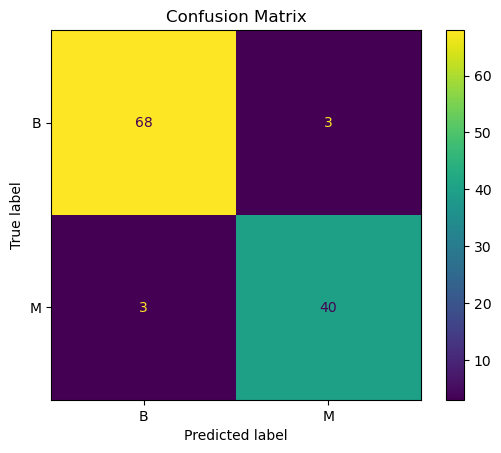

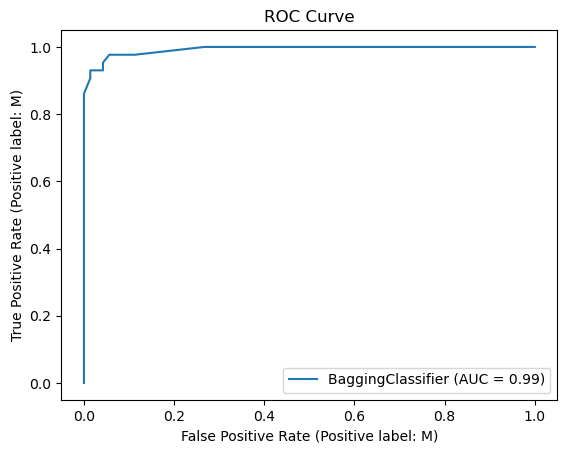

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

#result with 10 estimator

# Visualize Confusion Matrix
plot_confusion_matrix(bagging_clf_15, X_test_scaled, y_test)
plt.title("Confusion Matrix")

# Visualize ROC Curve
plot_roc_curve(bagging_clf_15, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


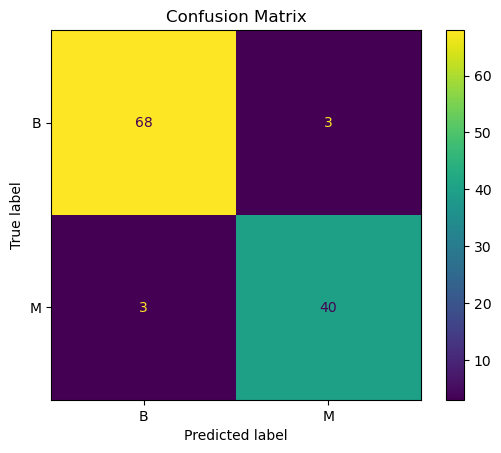

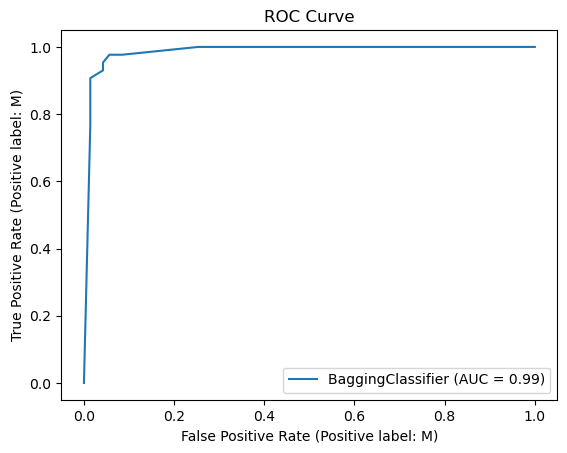

In [74]:
#result with 10 estimator

# Visualize Confusion Matrix
plot_confusion_matrix(bagging_clf_10, X_test_scaled, y_test)
plt.title("Confusion Matrix")

# Visualize ROC Curve
plot_roc_curve(bagging_clf_10, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


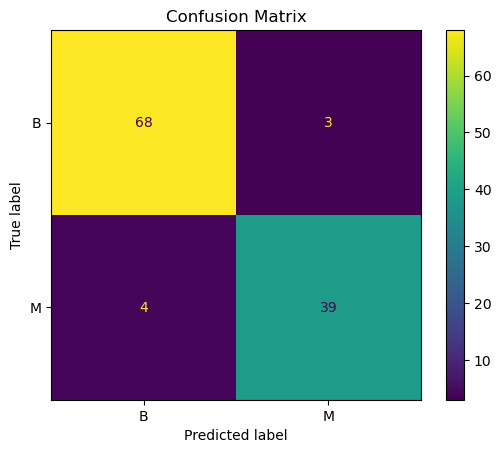

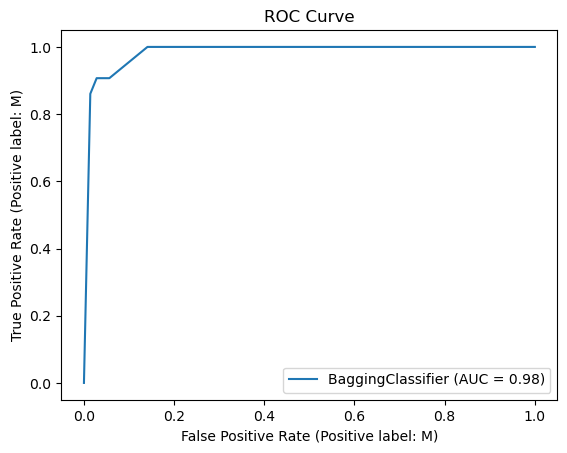

In [75]:
#result with 5 estimator

# Visualize Confusion Matrix
plot_confusion_matrix(bagging_clf_5, X_test_scaled, y_test)
plt.title("Confusion Matrix")

# Visualize ROC Curve
plot_roc_curve(bagging_clf_5, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

#### Feature Importance Plot

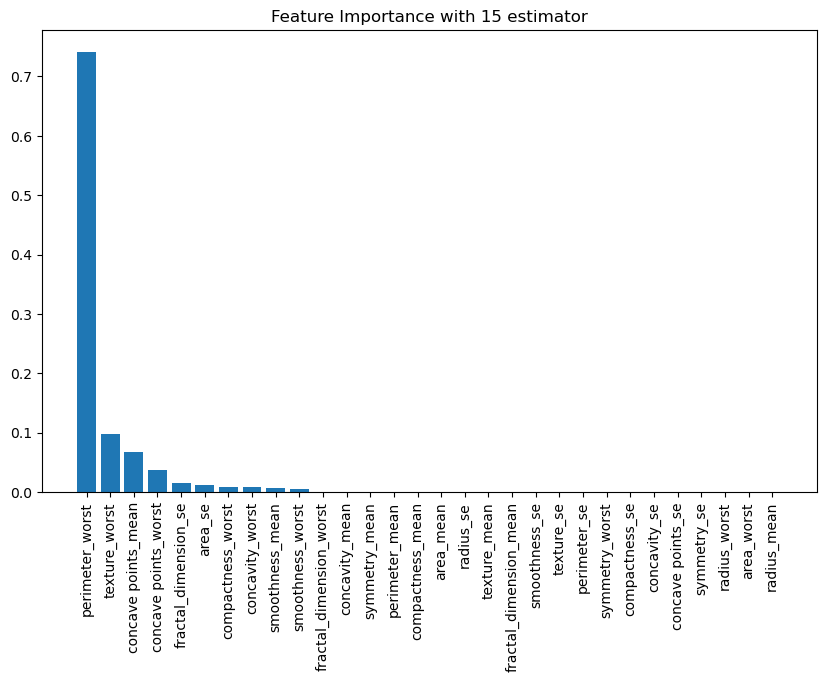

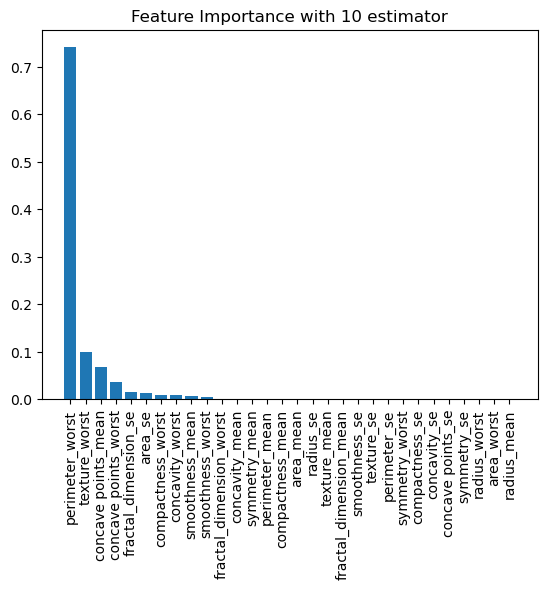

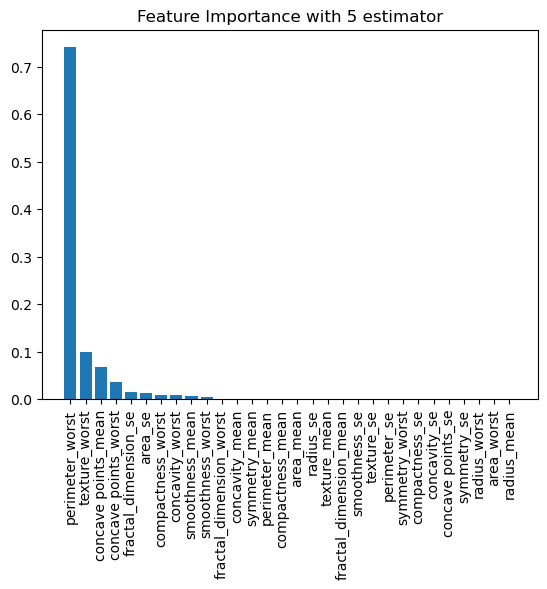

In [81]:
# Get feature importances from the model with different estimators
importances_15 = bagging_clf_15.estimators_[0].feature_importances_
importances_10 = bagging_clf_10.estimators_[0].feature_importances_
importances_5 = bagging_clf_5.estimators_[0].feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices_15 = np.argsort(importances_15)[::-1]
indices_10 = np.argsort(importances_10)[::-1]
indices_5 = np.argsort(importances_5)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances_15[indices_15])
plt.xticks(range(X.shape[1]), feature_names[indices_15], rotation=90)
plt.title('Feature Importance with 15 estimator')
plt.show()

plt.bar(range(X.shape[1]), importances_10[indices_10])
plt.xticks(range(X.shape[1]), feature_names[indices_10], rotation=90)
plt.title('Feature Importance with 10 estimator')
plt.show()

plt.bar(range(X.shape[1]), importances_5[indices_5])
plt.xticks(range(X.shape[1]), feature_names[indices_5], rotation=90)
plt.title('Feature Importance with 5 estimator')
plt.show()


##### decision trees & random forests

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [83]:
# Creating the decision tree classifier
decision_tree_clf = DecisionTreeClassifier(random_state=random_seed)

#Create the random forest classifier
random_forest_clf = RandomForestClassifier(n_estimators=10, random_state=random_seed)

In [95]:
# Trainning and evaluating Decision Tree Classifier
decision_tree_clf.fit(X_train_scaled, y_train)
decision_tree_pred = decision_tree_clf.predict(X_test_scaled)
decision_tree_results = evaluate_model(decision_tree_clf, decision_tree_pred)

print("Decision Tree Classifier", decision_tree_results)

# Trainning and evaluating Random Forest Classifier
random_forest_clf.fit(X_train_scaled, y_train)
random_forest_pred = random_forest_clf.predict(X_test_scaled)
random_forest_results = evaluate_model(random_forest_clf, random_forest_pred)

print("Random Forest Classifier", random_forest_results)


Decision Tree Classifier {'Accuracy': 0.9473684210526315, 'Precision': 0.9512195121951219, 'Recall': 0.9069767441860465, 'F1-score': 0.9285714285714286}
Random Forest Classifier {'Accuracy': 0.956140350877193, 'Precision': 0.9523809523809523, 'Recall': 0.9302325581395349, 'F1-score': 0.9411764705882352}


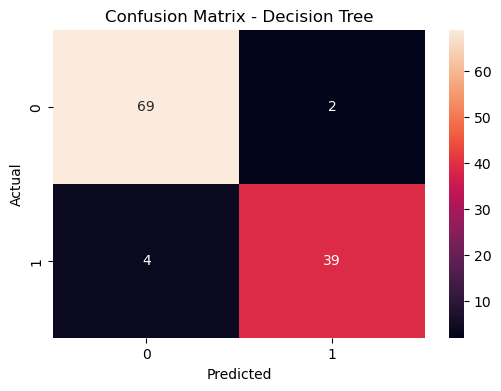

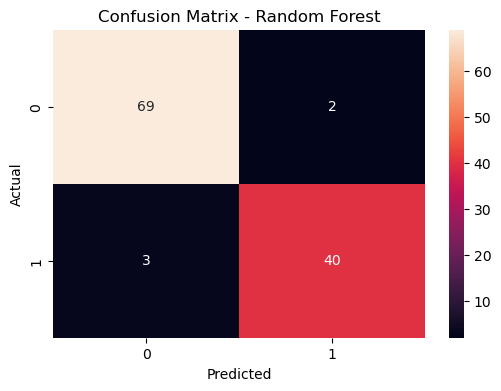

In [87]:
### visualize by Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix for decision tree
cm_decision_tree = confusion_matrix(y_test, decision_tree_pred)

# Plot the confusion matrix for decision tree
plt.figure(figsize=(6, 4))
sns.heatmap(cm_decision_tree, annot=True, fmt="d")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate the confusion matrix for random forest
cm_random_forest = confusion_matrix(y_test, random_forest_pred)

# Plot the confusion matrix for random forest
plt.figure(figsize=(6, 4))
sns.heatmap(cm_random_forest, annot=True, fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

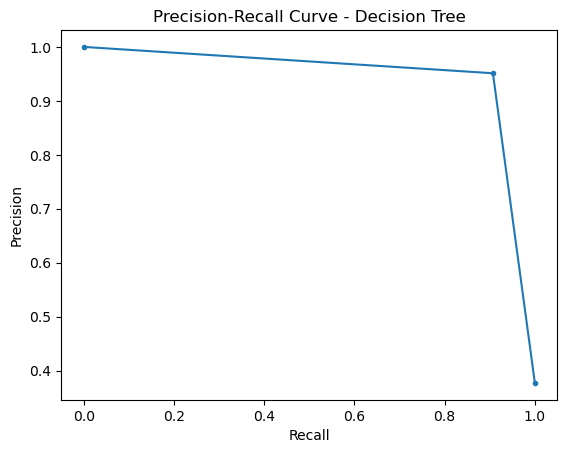

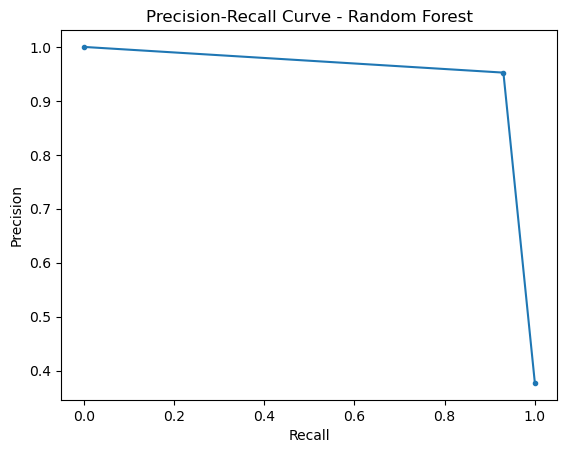

In [96]:
# visualize by Precision-Recall Curve

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Map 'B' to 0 and 'M' to 1
label_encoder = LabelEncoder()
y_test_mapped = label_encoder.fit_transform(y_test)

# Convert decision tree predictions to numerical values
decision_tree_pred_mapped = label_encoder.transform(decision_tree_pred)

# Calculate precision and recall for decision tree
precision_decision_tree, recall_decision_tree, _ = precision_recall_curve(y_test_mapped, decision_tree_pred_mapped)

# Plot precision-recall curve for decision tree
plt.plot(recall_decision_tree, precision_decision_tree, marker='.')
plt.title('Precision-Recall Curve - Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Convert random forest predictions to numerical values
random_forest_pred_mapped = label_encoder.transform(random_forest_pred)

# Calculate precision and recall for random forest
precision_random_forest, recall_random_forest, _ = precision_recall_curve(y_test_mapped, random_forest_pred_mapped)

# Plot precision-recall curve for random forest
plt.plot(recall_random_forest, precision_random_forest, marker='.')
plt.title('Precision-Recall Curve - Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

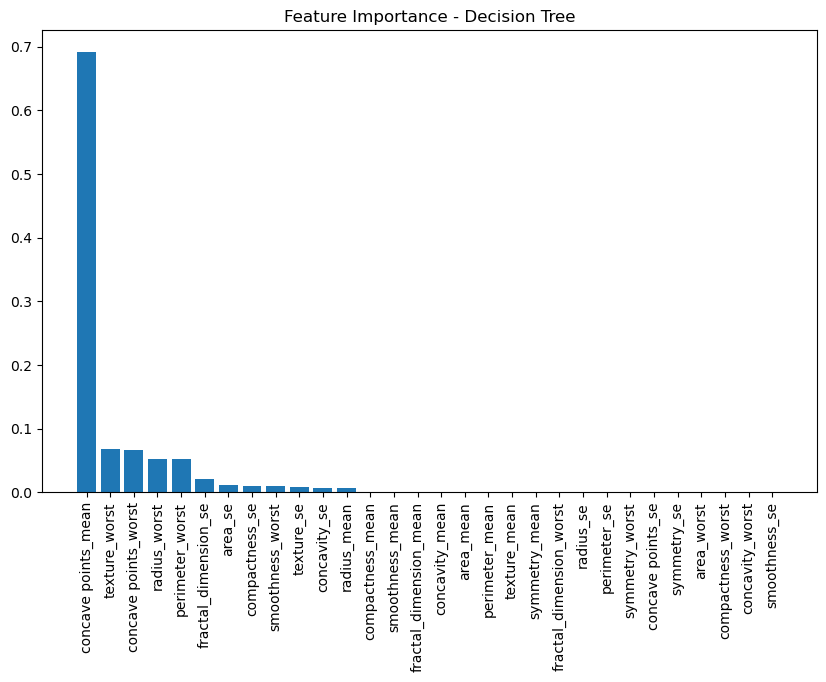

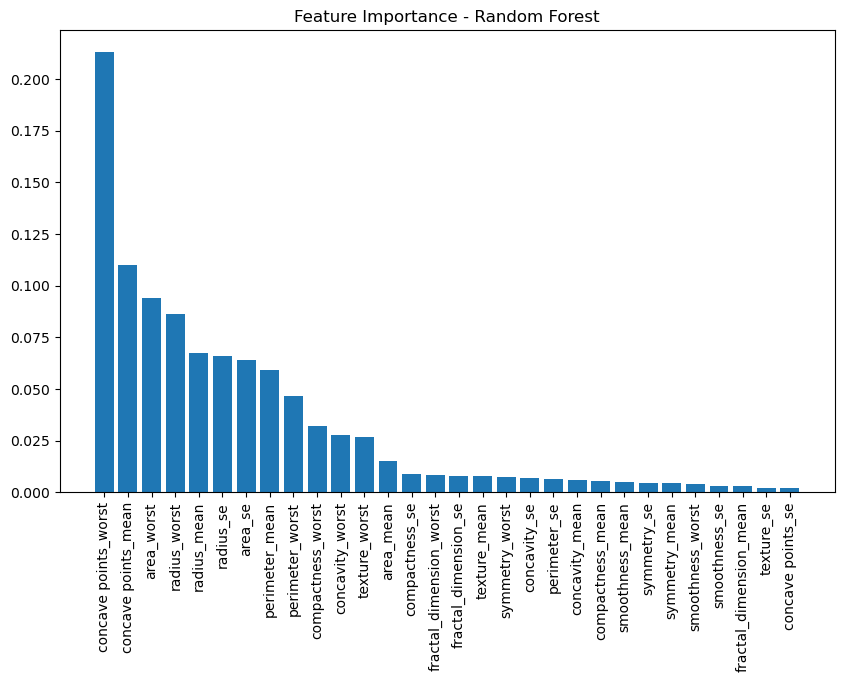

In [97]:
# visualize by Feature Importance Plot

# Get feature importances from decision tree
importances_decision_tree = decision_tree_clf.feature_importances_

# Get feature importances from random forest
importances_random_forest = random_forest_clf.feature_importances_

# Sort feature importances in descending order
indices_decision_tree = np.argsort(importances_decision_tree)[::-1]
indices_random_forest = np.argsort(importances_random_forest)[::-1]

# Plot feature importances for decision tree
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances_decision_tree[indices_decision_tree])
plt.xticks(range(X.shape[1]), feature_names[indices_decision_tree], rotation=90)
plt.title('Feature Importance - Decision Tree')
plt.show()

# Plot feature importances for random forest
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances_random_forest[indices_random_forest])
plt.xticks(range(X.shape[1]), feature_names[indices_random_forest], rotation=90)
plt.title('Feature Importance - Random Forest')
plt.show()